In [146]:
cost_type = [["shortest","passive"], ["shortest","active"],["shortestrestless","passive"], ["shortestrestless","active"],["shortestforemost","passive"]]
cost_type_cut = [['sh', 'pas'], ['sh', 'act'],['sh-rl', 'pas'], ['sh-rl', 'act'], ['sh-fm', 'pas']]
stri = ["non-strict"]
# path = "/home/mehdi/Nextcloud/experiments/betweenness_discrete/shortest/"
# names = [["primaryschool",False,"green"],["highschool_2012",False,"blue"], ["highschool_2011",False,"orange"], ["hospital_ward",False,"black"], ["workplace_2013",False,"red"], ["ht09",False,"brown"]]
# names_cut = []
path = "/home/mehdi/code/code_temporal_betweenness_/src/examples/"
names = [ ["erdos_1", False, "green"] , ["erdos_4", False, "red"] ]
be = ["bet_exact"]
names_cut = ["er1","er4"]
app = [-1]
percent = [10,20,30,40,50,60,70,80,90,-1]

In [147]:
def charact(path,st,cost_type,percent):
#     print(path+"info_"+ st + "_" + cost_type[0] + "_" + cost_type[1] + "_" + "-1_" +str(percent)+".txt")
    f = open(path+"info_"+ st + "_" + cost_type[0] + "_" + cost_type[1] + "_" + "-1_" +str(percent)+".txt", "r")
    i = 0
    for x in f:
        x = x[:-1]
        res = x.split(" ")
        if i == 0:
            n = int(res[-1])
        if i == 1:
            T = int(res[-1])
        if i == 2:
            m = int(res[-1])
        if i == 3:
            sm = int(res[-1])
        i = i + 1
    return (n,T,m,sm, str(res[-1])[:6])

In [148]:
def info_time(path,st,cost_type,percent,ff):
    f = open(path+"info_"+ st + "_" + cost_type[0] + "_" + cost_type[1] + "_" + "-1_" +str(percent)+".txt", "r")
#     print(nam,end='')
    i = 0
    bob = True
    for x in f:
        x = x[:-1]
        res = x.split(" ")
        # the mess in the conditions is due to ordering lines in file experiments
        if (i == 4) and res[0][:4]=="buss" and cost_type[0]=="shortest":
            ff.write(" & $"+str(res[-1])[:6]+"$ ")
        if i==4 and res[0][:4]!="buss":
            bob = False
            ff.write(" & $"+str(res[-1])[:6]+"$ ")
        elif i==5 and bob:
            ff.write(" & $"+str(res[-1])[:6]+"$ ")
            
        i += 1
        
ff = open("time_table.tex","w")    
ff.write("dataset & nodes & events & edges & agg_edges & Buss & sh act & sh pas  & sh-rl act & sh-rl pas & sh-fm pas  & static \\\\ \n")
#only for non strict

for i in range(len(names)):
    name,dire,col = names[i]
    if dire:
        path_db = path + name + ".csv_" + "directed" + "_exp_boost/"
    else:
        path_db = path + name + ".csv_" + "undirected" + "_exp_boost/"
    ff.write(names_cut[i]+" ")
    for j in range(len(cost_type)):
        if j == 0:
            n, T, m, sm, stat = charact(path_db,"non-strict",cost_type[j],-1)
            ff.write("& $"+str(n)+"$ & $"+str(T)+"$ & $"+ str(m)+"$ & $"+str(sm)+"$")
        info_time(path_db,"non-strict",cost_type[j],-1,ff)
    ff.write("& $"+stat+"$ \\\\"+"\n")
ff.close()

In [149]:
def bet_statique(path):
    f = open(path+"staticBet.txt", "r")
    stat = []
    bet_stat = []
    i = 0
    for x in f:
        x = x[:-1]
        stat.append([float(x),i])
        bet_stat.append(float(x))
        i = i + 1
    return bet_stat

In [150]:
def res_dic(path, be,stri,cost_type,app,T,precenttime):
    res = dict()
    res_bet = dict()
    res_sum_node = dict()
    res_sum_time = dict()

    for b in be:
        for st in stri:
            for co in cost_type:
                for ap in app:
                    for per in precenttime:
                    #print(path+b+"_"+st+"_"+co[0]+"_"+co[1]+"_"+str(ap)+".txt")
                        f = open(path+b+"_"+st+"_"+co[0]+"_"+co[1]+"_"+str(ap)+"_"+str(per)+".txt", "r")
                        if ap not in res:
                            res[ap] = dict()
                        if ap not in res_bet:
                            res_bet[ap] = dict()
                        if ap not in res_sum_node:
                            res_sum_node[ap] = dict()
                        if ap not in res_sum_time:
                            res_sum_time[ap] = dict()
                            
                        if per not in res[ap]:
                            res[ap][per] = dict()
                        if per not in res_bet[ap]:
                            res_bet[ap][per] = dict()
                        if per not in res_sum_node[ap]:
                            res_sum_node[ap][per] = dict()
                        if per not in res_sum_time[ap]:
                            res_sum_time[ap][per] = dict()

                        if st not in res[ap][per]:
                            res[ap][per][st] = dict()
                        if st not in res_bet[ap][per]:
                            res_bet[ap][per][st] = dict()
                        if st not in res_sum_node[ap][per]:
                            res_sum_node[ap][per][st] = dict()
                        if st not in res_sum_time[ap][per]:
                            res_sum_time[ap][per][st] = dict()

                        if b not in res_bet[ap][per][st]:
                            res_bet[ap][per][st][b] = dict()
                        res_bet[ap][per][st][b][co[0]+"_"+co[1]] = []

                        if b not in res[ap][per][st]:
                            res[ap][per][st][b] = dict()

                        if b not in res_sum_node[ap][per][st]:
                            res_sum_node[ap][per][st][b] = dict()
                        if b not in res_sum_time[ap][per][st]:
                            res_sum_time[ap][per][st][b] = dict()

                        if co[1] not in res[ap][per][st][b]:
                            res[ap][per][st][b][co[1]] = dict()
                        if co[1] not in res_sum_node[ap][per][st][b]:
                            res_sum_node[ap][per][st][b][co[1]] = dict()
                        if co[1] not in res_sum_time[ap][per][st][b]:
                            res_sum_time[ap][per][st][b][co[1]] = dict()

                        res[ap][per][st][b][co[1]][co[0]] = []

                        res_sum_time[ap][per][st][b][co[1]][co[0]] = [0 for i in range(T)]
                        res_sum_node[ap][per][st][b][co[1]][co[0]] = [0 for i in range(n)]



                        i = 0
                        for x in f:
                            res_sum_node[ap][per][st][b][co[1]][co[0]][i//T] +=  float(x)
                            res_sum_time[ap][per][st][b][co[1]][co[0]][i%T] += float(x)
#                             res[ap][per][st][b][co[1]][co[0]].append(float(x))
#                             res_bet[ap][per][st][b][co[0]+"_"+co[1]].append(float(x))
                            i += 1
    return (res_sum_node,res_sum_time)

In [151]:
import scipy.stats as stats
import matplotlib.pyplot as plt
def inter_10(res_sum_node,per,co):
    res = []
    for j in per:
        r = zip(res_sum_node[-1][-1]["non-strict"]["bet_exact"][co[1]][co[0]], [i for i in range(len(res_sum_node[-1][-1]["non-strict"]["bet_exact"][co[1]][co[0]]))])
        r2 = zip(res_sum_node[-1][j]["non-strict"]["bet_exact"][co[1]][co[0]], [i for i in range(len(res_sum_node[-1][j]["non-strict"]["bet_exact"][co[1]][co[0]]))])

        l = list(r)
        l2 = list(r2)

        l.sort(reverse=True)
        l2.sort(reverse=True)
                
        nb = 10
        s = set(list(map(lambda x : x[1] ,l[:nb])))
        s2 = set(list(map(lambda x : x[1] ,l2[:nb])))
        res.append(len(s.intersection(s2))/nb  )
    return res
    

def kendallrankTime(res_sum_node,per,co):
    res = []
    for i in per:
#         print("i",i)
#         print(co)
#         print(res_sum_node[-1][-1]["non-strict"]["bet_exact"][co[1]].keys(),res_sum_node[-1][i]["non-strict"]["bet_exact"][co[1]].keys())
        tau, p_value = stats.kendalltau(res_sum_node[-1][-1]["non-strict"]["bet_exact"][co[1]][co[0]], res_sum_node[-1][i]["non-strict"]["bet_exact"][co[1]][co[0]])
        res.append(tau)
    return res

In [152]:
cor = []
cor2 = []
for i in range(len(names)):
    name,dire,col = names[i]
    if dire:
        path_db = path + name + ".csv_" + "directed" + "_exp_boost/"
    else:
        path_db = path + name + ".csv_" + "undirected" + "_exp_boost/"
    res = []
    res2 = []
    n, T, m, sm, stat = charact(path_db,stri[0],cost_type[0],-1)
    res_sum_node,res_sum_time = res_dic(path_db,be,stri,cost_type,app,T,percent)
    for co in cost_type:
        l = kendallrankTime(res_sum_node,percent,co)
        l = [0] + l
        res.append(l)
        
        l2 = inter_10(res_sum_node,percent,co)
        l2 = [0] + l2
        res2.append(l2)
    cor.append(res)
    cor2.append(res2)

/tmp/ipykernel_367544/4224081693.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


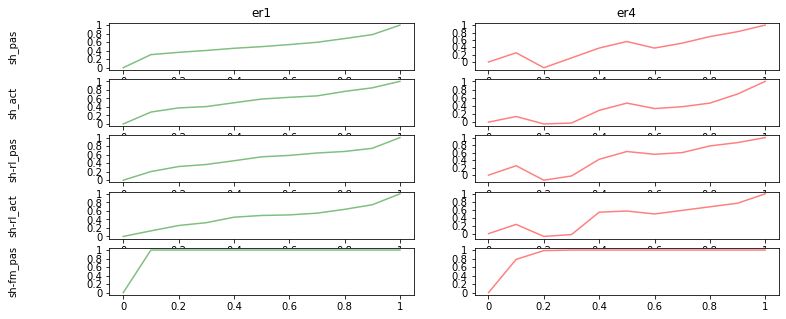

In [153]:
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(cost_type), len(names))
for i in range(len(names)):
    for j in range(len(cost_type)):
        axs[j, i].plot([0,10,20,30,40,50,60,70,80,90,100],cor[i][j], alpha=0.5, color = names[i][2])
        if j == 0 and i == 0:
            axs[j,i].set(xlabel='', title=names_cut[i],ylabel = cost_type_cut[j][0]+"_"+cost_type_cut[j][1])
        elif j == 0 and i != 0:
            axs[j,i].set(xlabel='', title=names_cut[i])
        elif j!= 0 and i == 0:
            axs[j,i].set(xlabel='',ylabel = cost_type_cut[j][0]+"_"+cost_type_cut[j][1])
        else:
            axs[j,i].set(xlabel='')
        axs[j,i].yaxis.set_label_coords(-0.3,0.5)
        axs[j,i].xaxis.set_label_coords(0.5,-0.02)
        axs[j,i].set_xticks([0,20,40,60,80,100], labels=[0,0.2,0.4,0.6,0.8,1])
        axs[j,i].set_yticks([0,0.2,0.4,0.6,0.8,1],labels=[0,0.2,0.4,0.6,0.8,1])

fig.set_size_inches(12, 5)
fig.savefig("pred_time.png")
fig.show()


/tmp/ipykernel_367544/2886245740.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


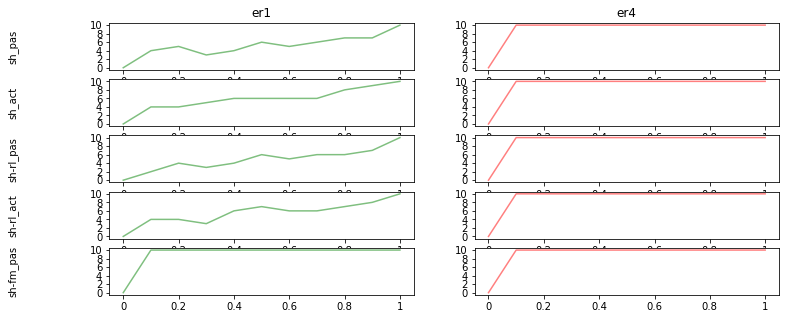

In [154]:
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(len(cost_type), len(names))
for i in range(len(names)):
    for j in range(len(cost_type)):
        axs[j, i].plot([0,10,20,30,40,50,60,70,80,90,100],cor2[i][j], alpha=0.5, color = names[i][2])
        if j == 0 and i == 0:
            axs[j,i].set(xlabel='', title=names_cut[i],ylabel = cost_type_cut[j][0]+"_"+cost_type_cut[j][1])
        elif j == 0 and i != 0:
            axs[j,i].set(xlabel='', title=names_cut[i])
        elif j!= 0 and i == 0:
            axs[j,i].set(xlabel='',ylabel = cost_type_cut[j][0]+"_"+cost_type_cut[j][1])
        else:
            axs[j,i].set(xlabel='')
        axs[j,i].yaxis.set_label_coords(-0.3,0.5)
        axs[j,i].xaxis.set_label_coords(0.5,-0.02)
        axs[j,i].set_xticks([0,20,40,60,80,100], labels=[0,0.2,0.4,0.6,0.8,1])
        axs[j,i].set_yticks([0,0.2,0.4,0.6,0.8,1],labels=[0,2,4,6,8,10])

fig.set_size_inches(12, 5)
fig.savefig("pred_inter_time.png")
fig.show()


In [112]:
import scipy.stats as stats
import matplotlib.pyplot as plt
def max_int(res_sum_node,bet_stat):
    r = zip(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["active"]["shortest"], [i for i in range(len(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["active"]["shortest"]))])
    r2 = zip(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["passive"]["shortest"], [i for i in range(len(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["passive"]["shortest"]))])
    r3 = zip(bet_stat, [i for i in range(len(bet_stat))])
    r4 = zip(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["passive"]["shortestrestless"], [i for i in range(len(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["passive"]["shortestrestless"]))])
    r5 = zip(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["active"]["shortestrestless"], [i for i in range(len(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["active"]["shortestrestless"]))])
    r6 = zip(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["passive"]["shortestforemost"], [i for i in range(len(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["passive"]["shortestforemost"]))])

    l = list(r)
    l2 = list(r2)
    l3 = list(r3)
    l4 = list(r4)
    l5 = list(r5)
    l6 = list(r6)
    
    l.sort(reverse=True)
    l2.sort(reverse=True)
    l3.sort(reverse=True)
    l4.sort(reverse=True)
    l5.sort(reverse=True)
    l6.sort(reverse=True)

    nb = 10
    s = set(list(map(lambda x : x[1] ,l[:nb])))
    s2 = set(list(map(lambda x : x[1] ,l2[:nb])))
    s3 = set(list(map(lambda x : x[1] ,l3[:nb])))
    s4 = set(list(map(lambda x : x[1] ,l4[:nb])))
    s5 = set(list(map(lambda x : x[1] ,l5[:nb])))
    s6 = set(list(map(lambda x : x[1] ,l6[:nb])))

    return [len(s5.intersection(s))/nb, len(s4.intersection(s2))/nb, len(s.intersection(s2))/nb, len(s.intersection(s3))/nb, len(s2.intersection(s3))/nb, len(s6.intersection(s3))/nb]
def kendallrank(res_sum_node,bet_stat):
    tau1, p_value = stats.kendalltau(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["active"]["shortestrestless"], res_sum_node[-1][-1]["non-strict"]["bet_exact"]["active"]["shortest"])
    tau2, p_value = stats.kendalltau(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["passive"]["shortestrestless"], res_sum_node[-1][-1]["non-strict"]["bet_exact"]["passive"]["shortest"])
    tau3, p_value = stats.kendalltau(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["passive"]["shortestrestless"], bet_stat)

    tau4, p_value = stats.kendalltau(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["active"]["shortest"], res_sum_node[-1][-1]["non-strict"]["bet_exact"]["passive"]["shortest"])
    tau5, p_value = stats.kendalltau(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["active"]["shortest"], bet_stat)
    tau6, p_value = stats.kendalltau(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["passive"]["shortest"], bet_stat)
    tau7, p_value = stats.kendalltau(res_sum_node[-1][-1]["non-strict"]["bet_exact"]["passive"]["shortestforemost"], bet_stat)

    return [tau1, tau2, tau4, tau5, tau6, tau7]

In [145]:
cor = []
maxx = []
for i in range(len(names)):
    name,dire,col = names[i]
    if dire:
        path_db = path + name + ".csv_" + "directed" + "_exp_boost/"
    else:
        path_db = path + name + ".csv_" + "undirected" + "_exp_boost/"
        
    n, T, m, sm, stat = charact(path_db,stri[0],cost_type[0],-1)
    res_sum_node,res_sum_time = res_dic(path_db,be,stri,cost_type,app,T,percent)
        
    bet_stat = bet_statique(path_db)
    l = kendallrank(res_sum_node,bet_stat)
    cor.append(l)
    l = max_int(res_sum_node,bet_stat)
    maxx.append(l)

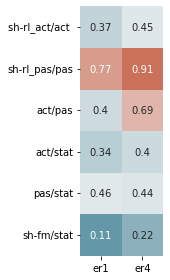

In [115]:
bet_comp = [ "sh-rl_act/act ","sh-rl_pas/pas", "act/pas", "act/stat", "pas/stat","sh-fm/stat"]
import numpy as np
import seaborn as sns
import pandas as pd
from pylab import savefig

cor_mat = np.matrix(cor)
transp = cor_mat.transpose()

df = pd.DataFrame.from_dict( data=transp)
df.index = bet_comp
df.columns = list(map(lambda x : x, names_cut))
f, ax = plt.subplots(figsize=(6, 4))
# corr = df.corr()
svm = sns.heatmap(df,
    cmap=sns.diverging_palette(220, 20, as_cmap=True),
    vmin=0, vmax=1.0,
    square=True, ax=ax, cbar=False, cbar_kws={"shrink": 0.5}, annot=transp)
figure = svm.get_figure()  
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 

figure.savefig('heat_short_node.png', dpi=400,bbox_inches='tight')
figure.tight_layout()

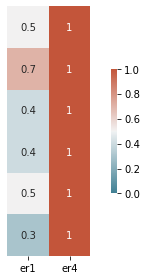

In [116]:
import numpy as np
import seaborn as sns
import pandas as pd
from pylab import savefig

maxx_mat = np.matrix(maxx)
transp = maxx_mat.transpose()

df = pd.DataFrame.from_dict( data=transp)
df.index = bet_comp
df.columns = list(map(lambda x : x, names_cut))
f, ax = plt.subplots(figsize=(6, 4))
# corr = df.corr()
svm = sns.heatmap(df, cmap=sns.diverging_palette(220, 20, as_cmap=True),
    vmin=0, vmax=1.0,
    square=True, ax=ax, cbar_kws={"shrink": 0.5}, annot=transp)
svm.set_yticks([])
figure = svm.get_figure()  
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 

figure.savefig('heat_short_node_inter.png', dpi=400,bbox_inches='tight')
figure.tight_layout()

In [117]:
time = []
for i in range(len(names)):
    name,dire,col = names[i]
    if dire:
        path_db = path + name + ".csv_" + "directed" + "_exp_boost/"
    else:
        path_db = path + name + ".csv_" + "undirected" + "_exp_boost/"
        
    n, T, m, sm, stat = charact(path_db,stri[0],cost_type[0],-1)
    res_sum_node,res_sum_time = res_dic(path_db,be,stri,cost_type,app,T,percent)
    time.append([])
    for j in range(len(cost_type)):
        time[i].append(res_sum_time[-1][-1]["non-strict"]["bet_exact"][cost_type[j][1]][cost_type[j][0]])

/tmp/ipykernel_367544/3180046548.py:39: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


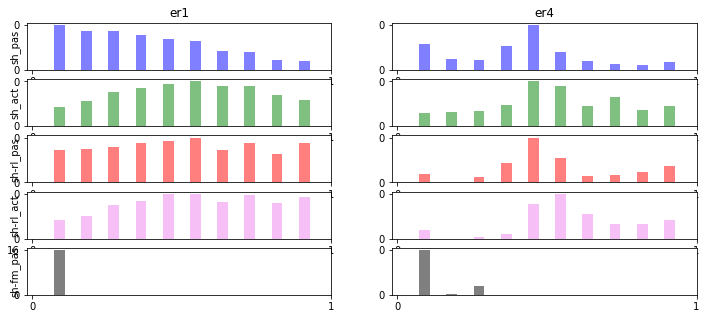

In [127]:
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt
colors = ["blue","green","red","violet","black","brown"]
fig, axs = plt.subplots(len(cost_type), len(names))
for i in range(len(names)):
    for j in range(len(cost_type)):
        ti = time[i][j]
        s = list(map(lambda x : x/1, ti ))
        t = [jj for jj in range(len(ti))]
        nb = 20
        ba_val = []
        su = sum(ti)
        bins = np.arange(0, len(ti), len(ti)/(nb+1)) # fixed bin size
        for jj in range(len(list(bins))-1):
            ba_val.append(sum(ti[int(bins[jj]):int(bins[jj+1])]))
            
        
        axs[j, i].bar([jj for jj in range(len(ba_val))],ba_val, alpha=0.5, color = colors[j])
        if j == 0 and i == 0:
            axs[j,i].set(xlabel='', title=names_cut[i],ylabel = cost_type_cut[j][0]+"_"+cost_type_cut[j][1])
        elif j == 0 and i != 0:
            axs[j,i].set(xlabel='', title=names_cut[i])
        elif j != 0 and i == 0:
            axs[j,i].set(xlabel='',ylabel = cost_type_cut[j][0]+"_"+cost_type_cut[j][1])
        else:
            axs[j,i].set(xlabel='')


#     axs[0,i].set(xlabel='time life', ylabel='B(t)',title=names[i][0])
        axs[j,i].yaxis.set_label_coords(-0.02,0.5)
        axs[j,i].xaxis.set_label_coords(0.5,-0.02)
        axs[j,i].set_xticks([-1,nb+1], labels=[0,1])
        axs[j,i].set_yticks([0,max(ba_val)],labels=[0,int(max(ba_val)/100)])    

# fig.tight_layout(pad = 1)
fig.set_size_inches(12, 5)
fig.savefig("short_time.png")
fig.show()
